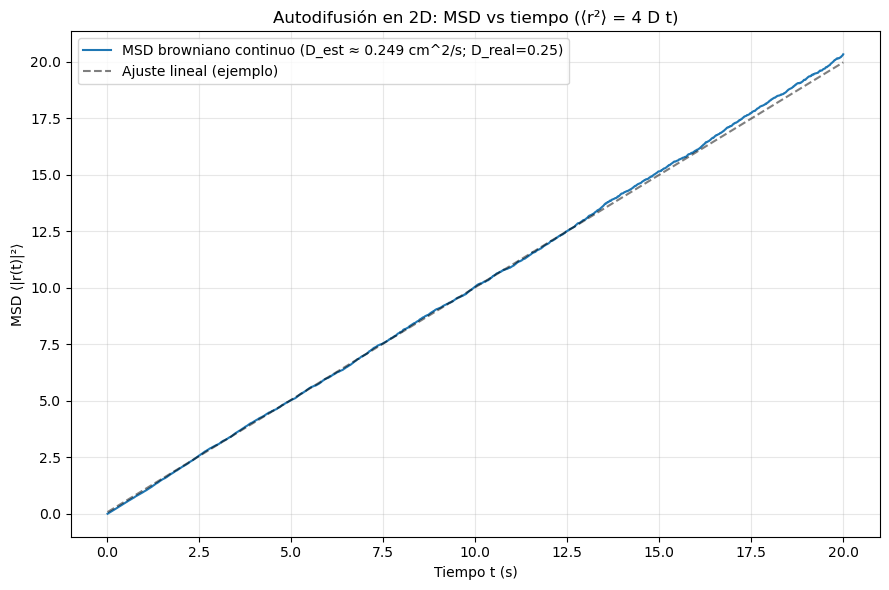

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Simulación de autodifusión (Browniano) en 2D
# Dos enfoques: (A) caminata en red; (B) pasos gaussianos continuos
# Calculamos el desplazamiento cuadrático medio (MSD) y estimamos D.
# ---------------------------

rng = np.random.default_rng(42)

# Parámetros de simulación
n_particulas = 5000      # número de partículas independientes
n_pasos = 2000           # pasos de tiempo
Delta_t = 1e-2           # tamaño de paso temporal (s)

# (A) Caminata aleatoria en red (paso unitario por eje)
# Cada paso, la partícula se mueve +/-1 en x o y con igual probabilidad
movs = np.array([(1,0), (-1,0), (0,1), (0,-1)])
trayectorias_A = np.zeros((n_particulas, n_pasos, 2), dtype=float)
pos = np.zeros((n_particulas, 2), dtype=float)
for t in range(n_pasos):
    indices = rng.integers(0, 4, size=n_particulas)
    paso = movs[indices]
    pos = pos + paso
    trayectorias_A[:, t, :] = pos

# (B) Movimiento browniano continuo con pasos gaussianos
# Varianza por dimensión: 2*D*Delta_t. Elegimos D_verdadero y generamos.
D_verdadero = 0.25  # cm^2/s (valor arbitrario para el ejemplo)
trayectorias_B = np.zeros((n_particulas, n_pasos, 2), dtype=float)
pos = np.zeros((n_particulas, 2), dtype=float)

sigma = np.sqrt(2 * D_verdadero * Delta_t)  # desviación típica por dimensión
for t in range(n_pasos):
    dpos = rng.normal(0.0, sigma, size=(n_particulas, 2))
    pos = pos + dpos
    trayectorias_B[:, t, :] = pos

# Función para calcular MSD(t) = <|r(t) - r(0)|^2>
# Tomamos r(0)=0 por construcción; promediamos sobre partículas
def msd_from_trajs(trajs):
    # trayectorias: (N, T, 2)
    r2 = np.sum(trajs**2, axis=2)  # (N, T)
    return r2.mean(axis=0)

msd_A = msd_from_trajs(trayectorias_A)
msd_B = msd_from_trajs(trayectorias_B)

tiempo = np.arange(1, n_pasos+1) * Delta_t

# Estimar D a partir de MSD = 4 D t en 2D (pendiente/4)
# Ajustamos recta a MSD vs t en la ventana inicial donde la ley es lineal
ini, fin = 100, 1200  # evitar transitorios iniciales ruidosos y saturaciones numéricas
coef_A = np.polyfit(tiempo[ini:fin], msd_A[ini:fin], 1)
coef_B = np.polyfit(tiempo[ini:fin], msd_B[ini:fin], 1)
pend_A, inter_A = coef_A
pend_B, inter_B = coef_B

D_est_A = pend_A / 4.0
D_est_B = pend_B / 4.0

# Graficar
plt.figure(figsize=(9,6))
#plt.plot(tiempo, msd_A, label=f"MSD caminata en red (D_est ≈ {D_est_A:.3f} u^2/s)")
plt.plot(tiempo, msd_B, label=f"MSD browniano continuo (D_est ≈ {D_est_B:.3f} cm^2/s; D_real={D_verdadero})")
plt.plot(tiempo, pend_B*tiempo + inter_B, 'k--', alpha=0.5, label="Ajuste lineal (ejemplo)")
plt.xlabel("Tiempo t (s)")
plt.ylabel("MSD ⟨|r(t)|²⟩")
plt.title("Autodifusión en 2D: MSD vs tiempo (⟨r²⟩ = 4 D t)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Guardar figura
plt.savefig('autodifusion_msd.png', dpi=160)


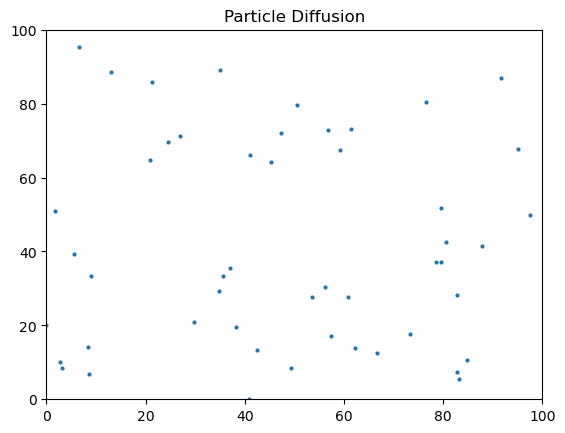

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 1. Setup the simulation environment
fig, ax = plt.subplots()
# Create a container for particles (e.g., dots)
particles, = ax.plot([], [], 'o', markersize=2)
ax.set_xlim(0, 100) # Example boundaries
ax.set_ylim(0, 100)
ax.set_title("Particle Diffusion")

# 2. Initialize particles (e.g., random positions)
N = 50 # Number of particles
x = np.random.rand(N) * 100
y = np.random.rand(N) * 100

# 3. Animation update function
def update(frame):
    global x, y
    # Simple random walk update (diffusion step)
    x += np.random.randn(N) * 0.5 # Small random step
    y += np.random.randn(N) * 0.5

    # Boundary conditions (e.g., bounce back or wrap around)
    x = np.clip(x, 0, 100) # Keep particles within bounds
    y = np.clip(y, 0, 100)

    particles.set_data(x, y)
    return particles,

# 4. Create the animation
ani = animation.FuncAnimation(fig, update, frames=200, interval=50, blit=True)
plt.show()

# To save as GIF (requires imagemagick or ffmpeg)
ani.save('diffusion_particles.gif', writer='imagemagick', fps=20)


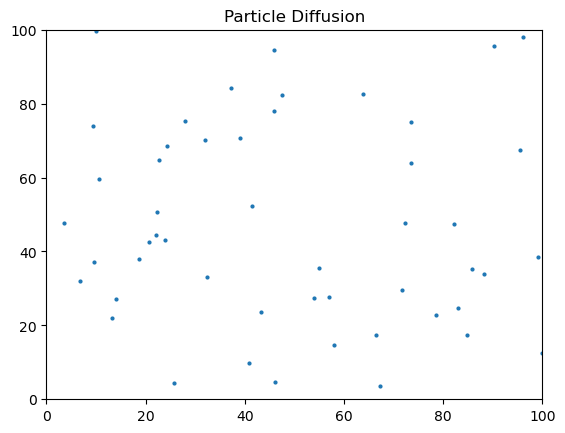

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# 1. Setup the simulation environment
fig, ax = plt.subplots()
particles, = ax.plot([], [], 'o', markersize=2)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_title("Particle Diffusion")

# 2. Initialize particles
N = 50
x = np.random.rand(N) * 100
y = np.random.rand(N) * 100

# 3. Init and update functions
def init():
    particles.set_data([], [])
    return particles,

def update(frame):
    global x, y
    # random walk
    x += np.random.randn(N) * 0.5
    y += np.random.randn(N) * 0.5
    # bounds
    x = np.clip(x, 0, 100)
    y = np.clip(y, 0, 100)
    particles.set_data(x, y)
    return particles,

# 4. Create the animation
ani = animation.FuncAnimation(fig, update, frames=200, interval=50, blit=True, init_func=init)

# Guardar como GIF sin dependencias externas
ani.save('diffusion_particles.gif', writer=PillowWriter(fps=20))

plt.show()

